In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [76]:
data = pd.read_csv("../../data/lunar_point_cloud.csv")

In [77]:
data

,x,y,z,theta,omega
0,0.000,0.000,204.000,0.000,0.000
1,-0.000,0.000,108.000,0.000,0.000
2,0.000,0.000,433.000,0.000,0.017
3,0.000,0.000,124.000,0.000,0.157
4,-0.000,0.000,122.000,0.000,0.209
...,...,...,...,...,...
5995,-1.012,3.776,111.932,0.035,1.309
5996,1.517,5.663,167.898,0.035,1.309
5997,-1.214,3.972,118.928,0.035,1.274
5998,-1.694,5.540,165.899,0.035,1.274


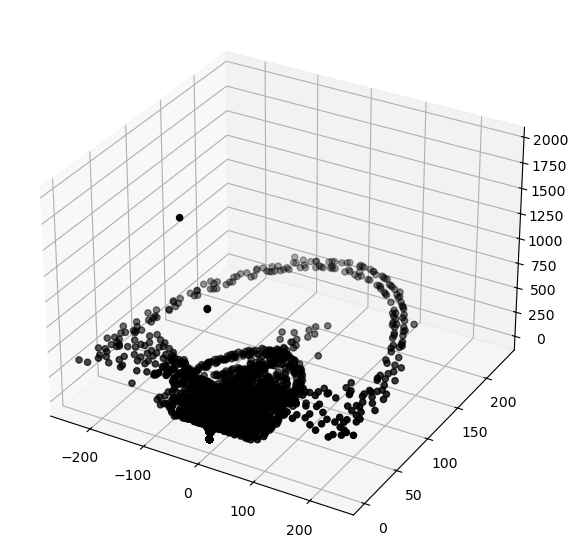

In [78]:

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(data['x'], data['y'], data['z'], color='black')
plt.show()

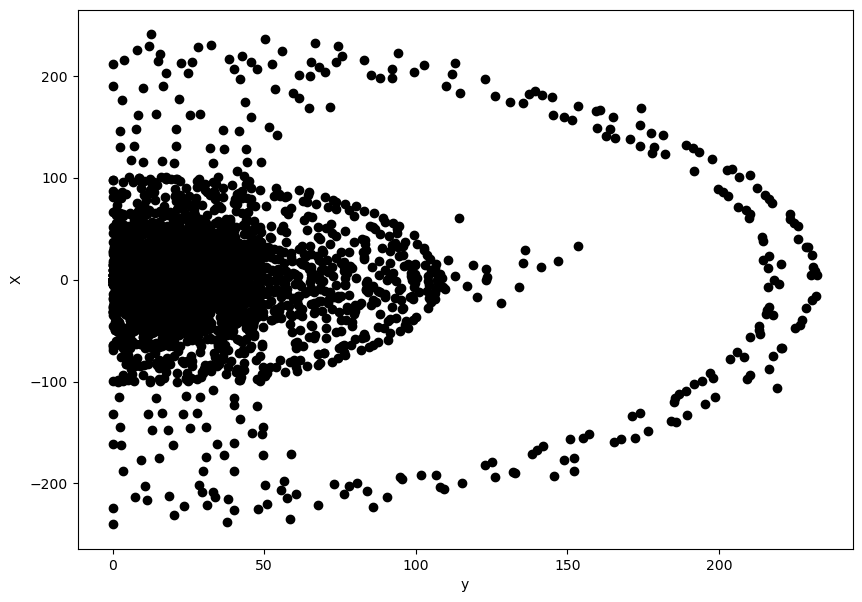

In [79]:
plt.figure(figsize=(10, 7))
plt.scatter(data['y'], data['x'], color='black')
plt.xlabel('y')
plt.ylabel('X')
plt.show()


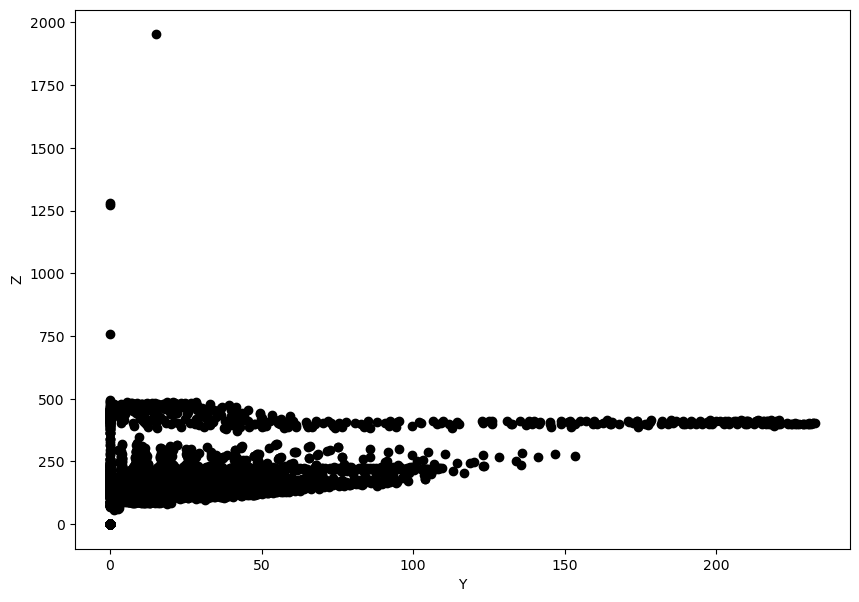

In [80]:
plt.figure(figsize=(10, 7))
plt.scatter(data['y'], data['z'], color='black')
plt.xlabel('Y')
plt.ylabel('Z')
plt.show()


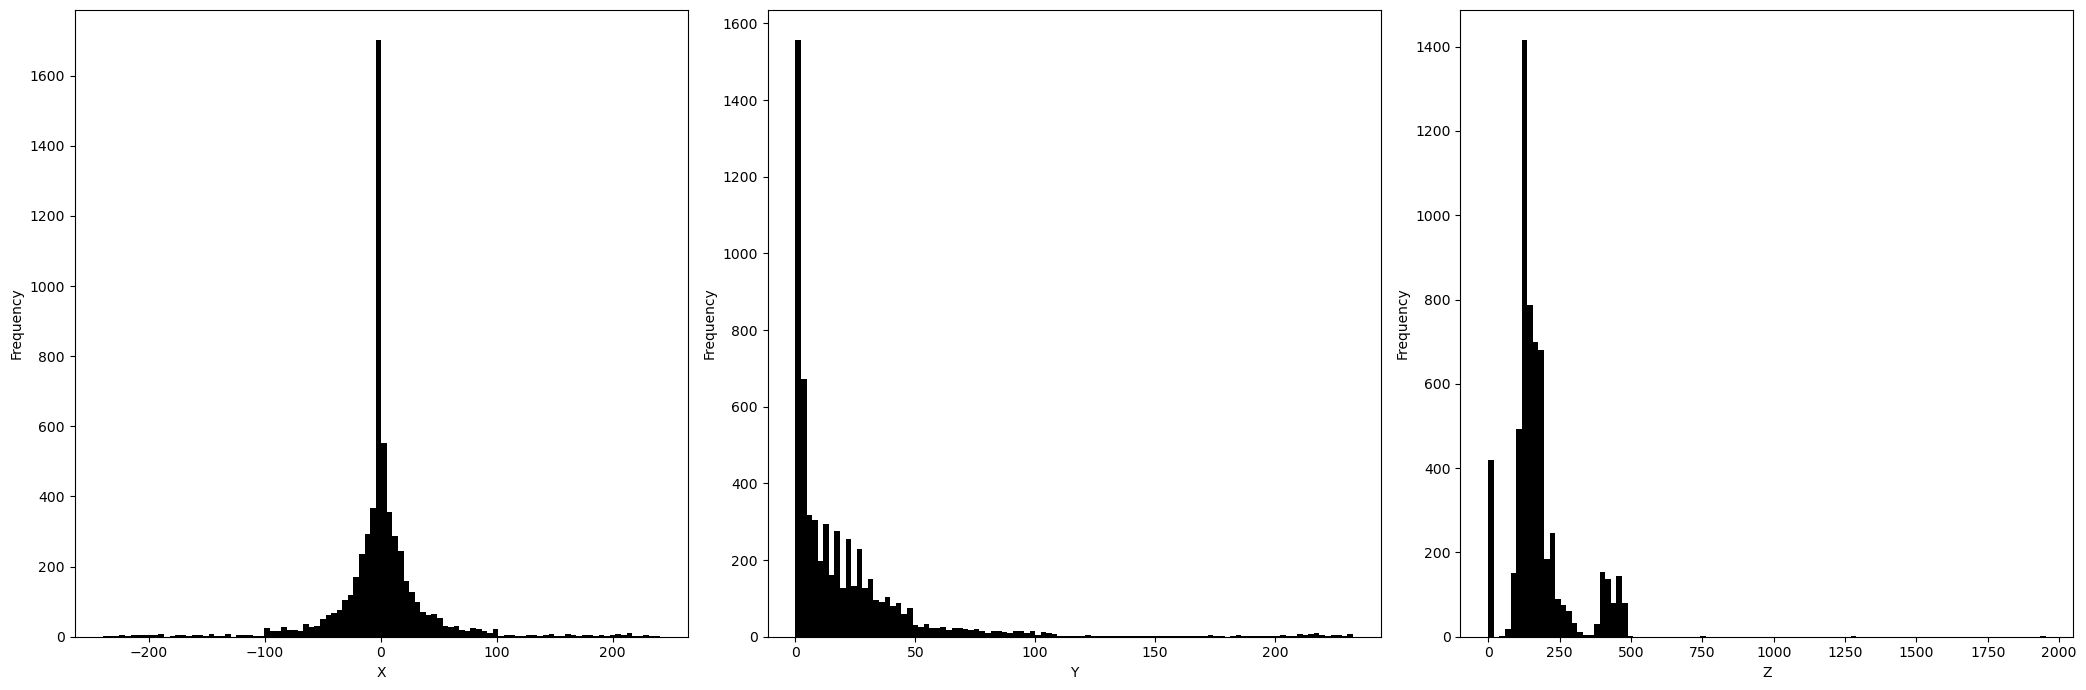

In [81]:
plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 1)
plt.hist(data['x'], bins=100, color='black')
plt.xlabel('X')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['y'], bins=100, color='black')
plt.xlabel('Y')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['z'], bins=100, color='black')
plt.xlabel('Z')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [82]:
data['theta'].head(980)

0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
975    0.175
976    0.175
977    0.175
978    0.175
979    0.175
Name: theta, Length: 980, dtype: float64

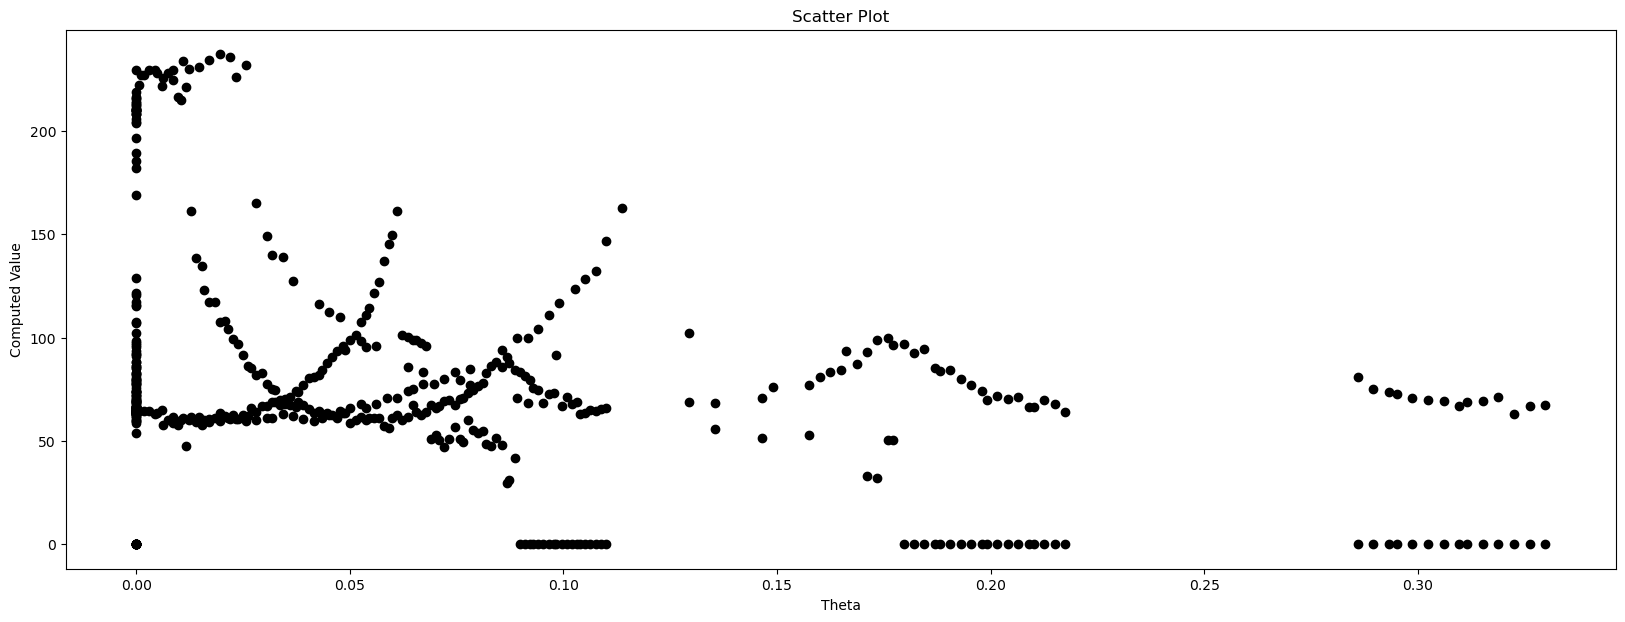

In [83]:
plt.figure(figsize=(20, 7))
#weights
w1 = 0.1
w2 = 0.7
w3 = 0.5
i=0
listx = data['x'].tolist()
listy = data['y'].tolist()
listz = data['z'].tolist()
listt = data['theta'].tolist()
listo = data['omega'].tolist()
while i<500:
    x = listx[i]
    y = listy[i]
    z = listz[i]
    abc = x * w1 + y * w2 + z * w3
    t = listt[i]
    o = listo[i]
    angle = t*o
    plt.scatter(angle, abc, color='black')
    i += 1

plt.xlabel('Theta')  # Label x-axis
plt.ylabel('Computed Value')  # Label y-axis
plt.title('Scatter Plot')  # Set title

plt.show()

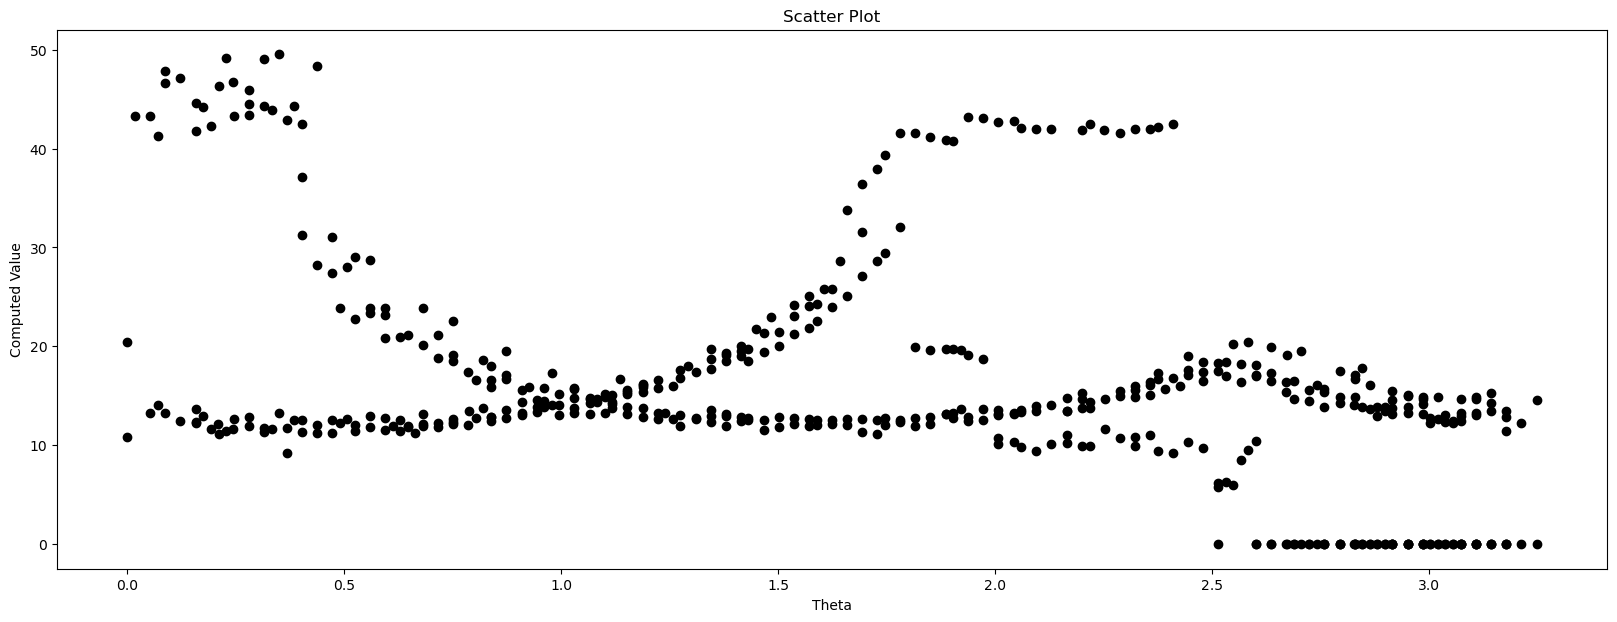

In [84]:
plt.figure(figsize=(20, 7))
#weights
w1 = 0.1
w2 = 0.1
w3 = 0.1
i=0
listx = data['x'].tolist()
listy = data['y'].tolist()
listz = data['z'].tolist()
listt = data['theta'].tolist()
listo = data['omega'].tolist()
while i<500:
    x = listx[i]
    y = listy[i]
    z = listz[i]
    abc = x * w1 + y * w2 + z * w3
    t = listt[i]
    o = listo[i]
    angle = t+o
    plt.scatter(angle, abc, color='black')
    i += 1

plt.xlabel('Theta')  # Label x-axis
plt.ylabel('Computed Value')  # Label y-axis
plt.title('Scatter Plot')  # Set title

plt.show()

In [85]:
pd.read_csv('../../data/lunar_point_cloud.csv', skiprows=lambda x: (x != 0) and not x % 2)

,x,y,z,theta,omega
0,0.000,0.000,204.000,0.000,0.000
1,0.000,0.000,433.000,0.000,0.017
2,-0.000,0.000,122.000,0.000,0.209
3,0.000,0.000,117.000,0.000,0.367
4,0.000,0.000,234.000,0.000,0.559
...,...,...,...,...,...
2995,1.079,6.118,177.892,0.035,1.396
2996,-1.212,6.235,181.889,0.035,1.379
2997,1.413,6.121,179.890,0.035,1.344
2998,1.517,5.663,167.898,0.035,1.309


In [86]:
even = []

# Iterate over rows in the DataFrame
for i, row in data.iterrows():
    if i % 2 == 1:
        even.append(row.tolist())

even_rows = pd.DataFrame(even)
new_columns = ['x', 'y', 'z', 'theta', 'omega']
even_rows.columns = new_columns

even_rows.head(10)

,x,y,z,theta,omega
0,-0.0,0.0,108.0,0.0,0.000
1,0.0,0.0,124.0,0.0,0.157
2,-0.0,0.0,459.0,0.0,0.279
3,-0.0,0.0,371.0,0.0,0.401
4,-0.0,0.0,232.0,0.0,0.593
5,0.0,0.0,119.0,0.0,0.646
6,0.0,0.0,191.0,0.0,0.750
7,0.0,0.0,166.0,0.0,0.838
8,0.0,0.0,171.0,0.0,0.873
9,0.0,0.0,159.0,0.0,0.925


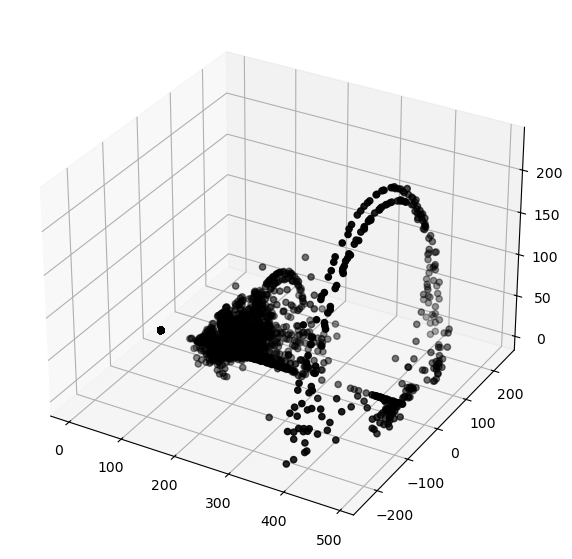

In [87]:

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(even_rows['z'], even_rows['x'], even_rows['y'], color='black')
plt.show()

In [88]:
odd = []

for i, row in data.iterrows():
    if i % 2 == 0:  
        odd.append(row.tolist())

odd_rows = pd.DataFrame(odd)
new_columns = ['x', 'y', 'z', 'theta', 'omega']
odd_rows.columns = new_columns

odd_rows.head(10)

,x,y,z,theta,omega
0,0.0,0.0,204.0,0.0,0.000
1,0.0,0.0,433.0,0.0,0.017
2,-0.0,0.0,122.0,0.0,0.209
3,0.0,0.0,117.0,0.0,0.367
4,0.0,0.0,234.0,0.0,0.559
5,-0.0,0.0,119.0,0.0,0.611
6,0.0,0.0,120.0,0.0,0.681
7,-0.0,0.0,124.0,0.0,0.750
8,-0.0,0.0,129.0,0.0,0.838
9,0.0,0.0,133.0,0.0,0.908


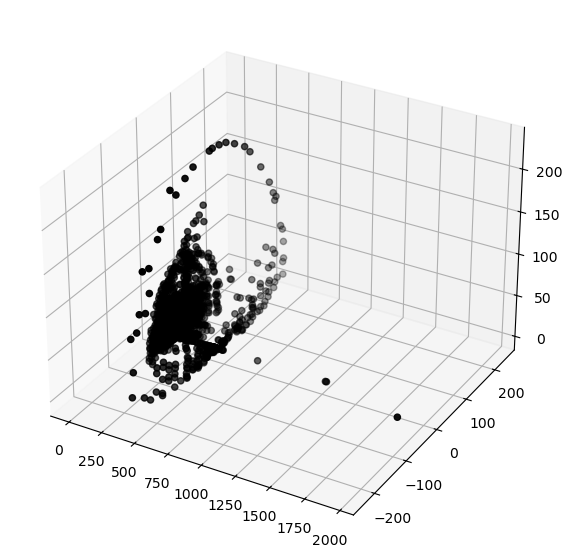

In [89]:

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(odd_rows['z'], odd_rows['x'], odd_rows['y'], color='black')
plt.show()

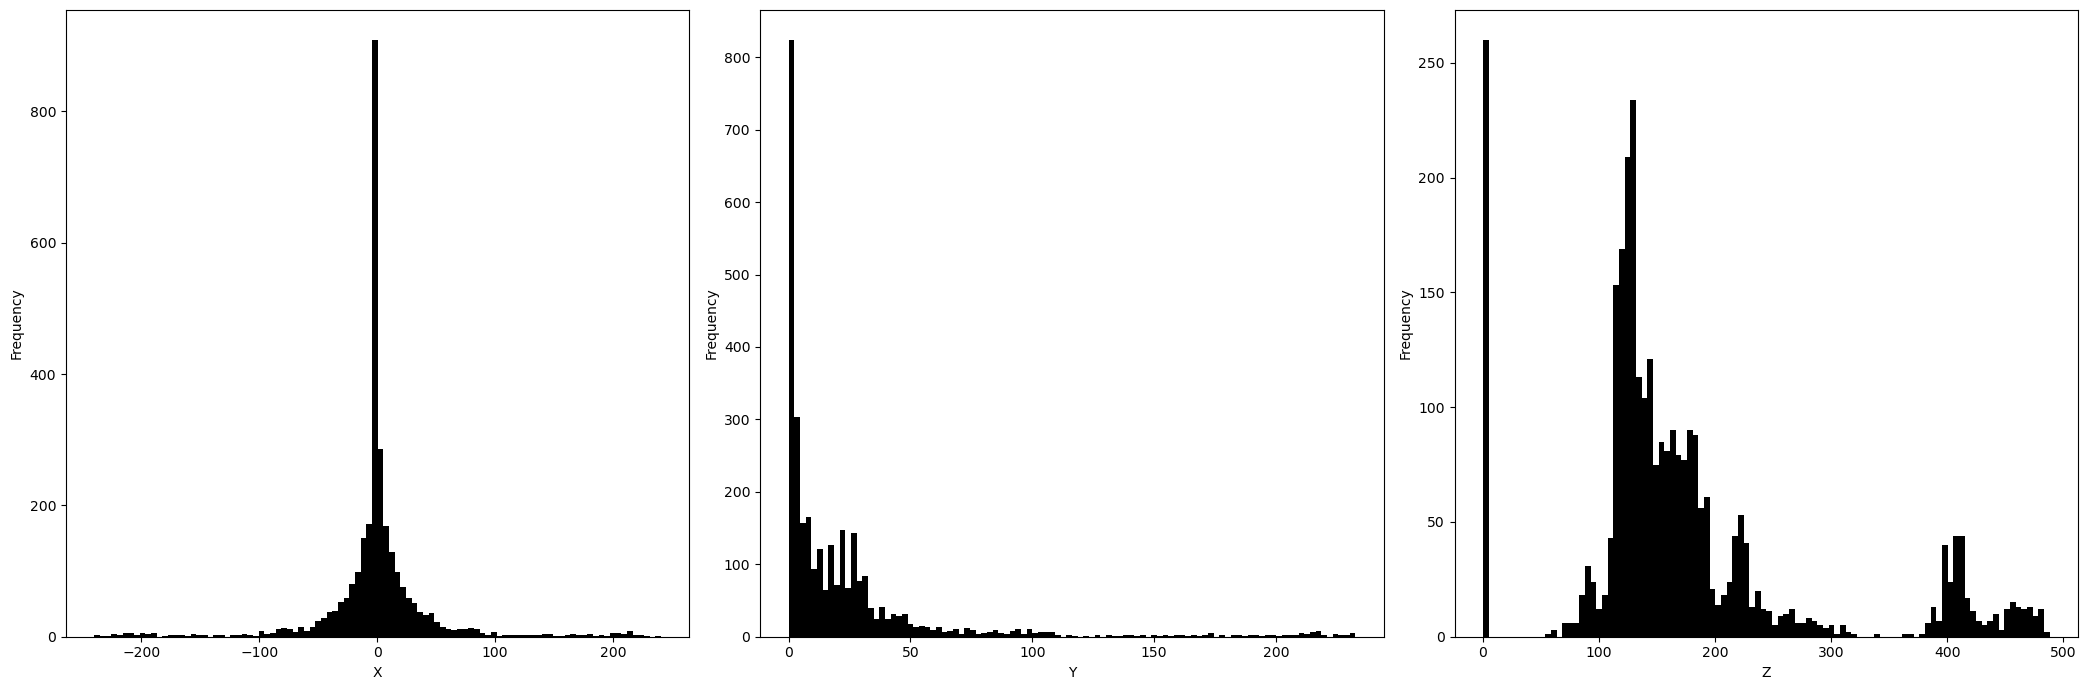

In [90]:
plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 1)
plt.hist(even_rows['x'], bins=100, color='black')
plt.xlabel('X')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(even_rows['y'], bins=100, color='black')
plt.xlabel('Y')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(even_rows['z'], bins=100, color='black')
plt.xlabel('Z')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

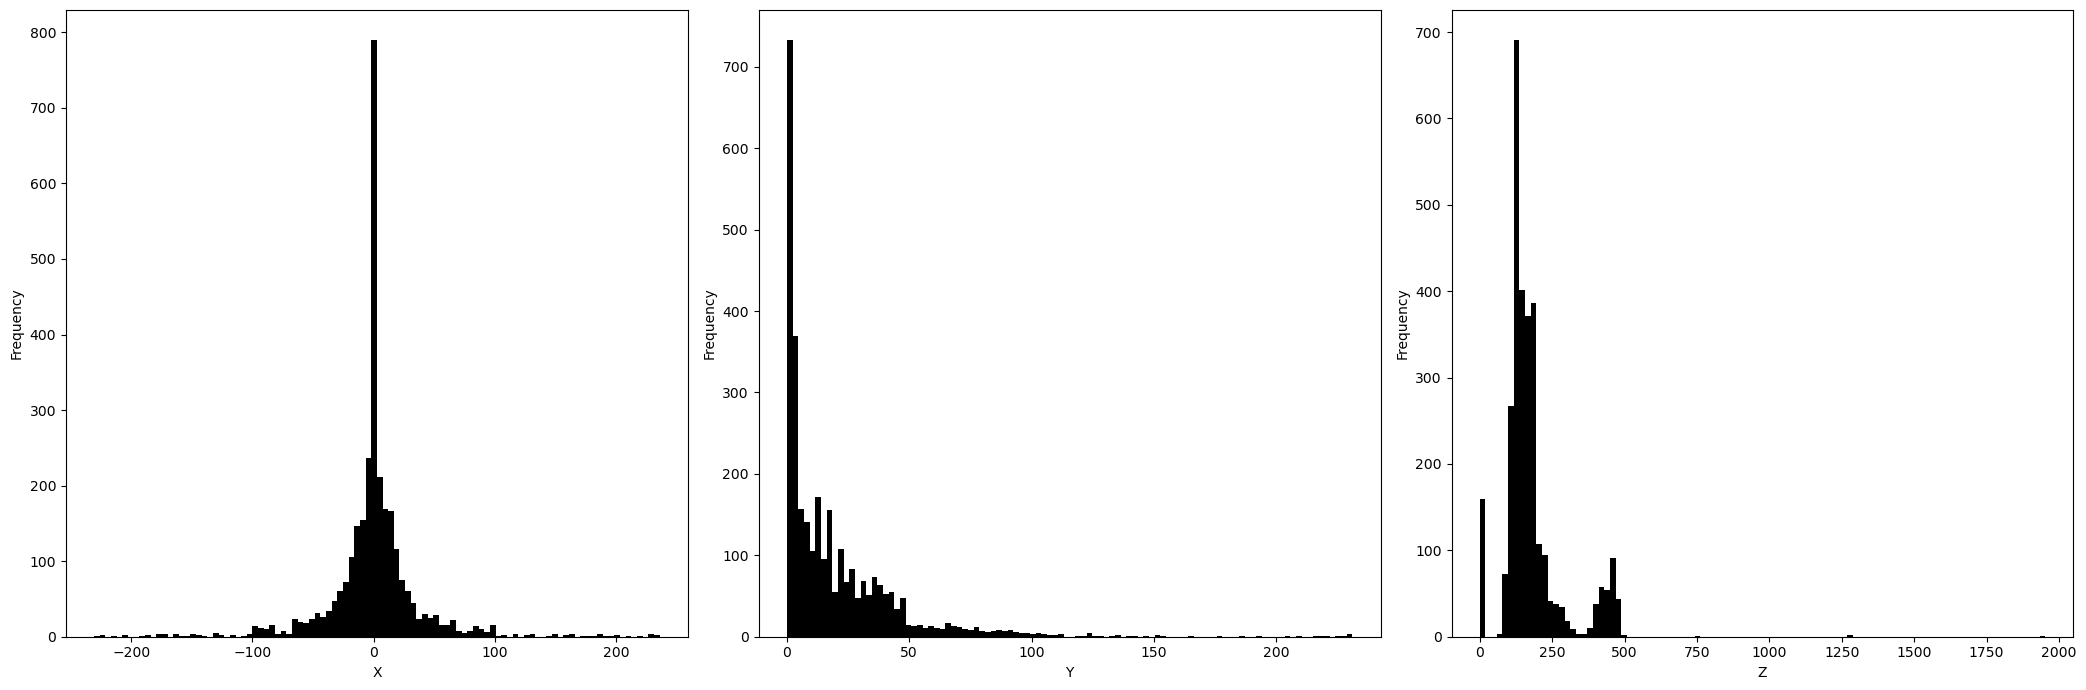

In [91]:
plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 1)
plt.hist(odd_rows['x'], bins=100, color='black')
plt.xlabel('X')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(odd_rows['y'], bins=100, color='black')
plt.xlabel('Y')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(odd_rows['z'], bins=100, color='black')
plt.xlabel('Z')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

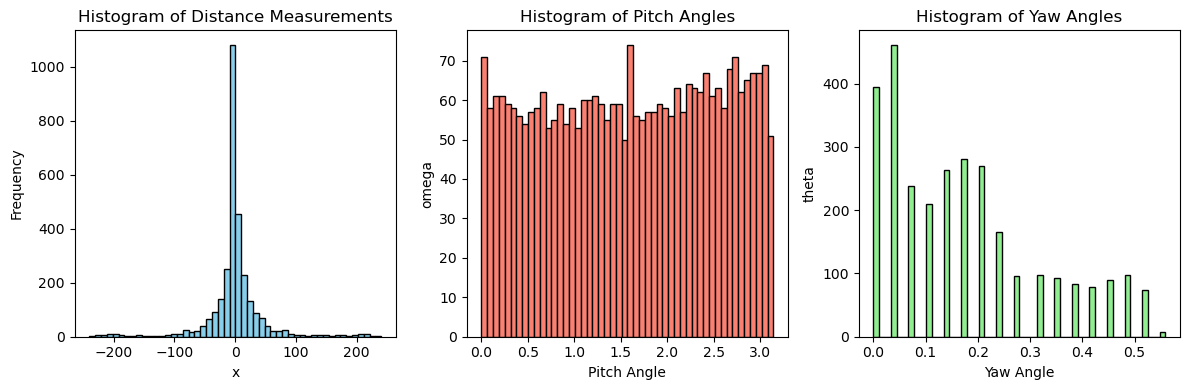

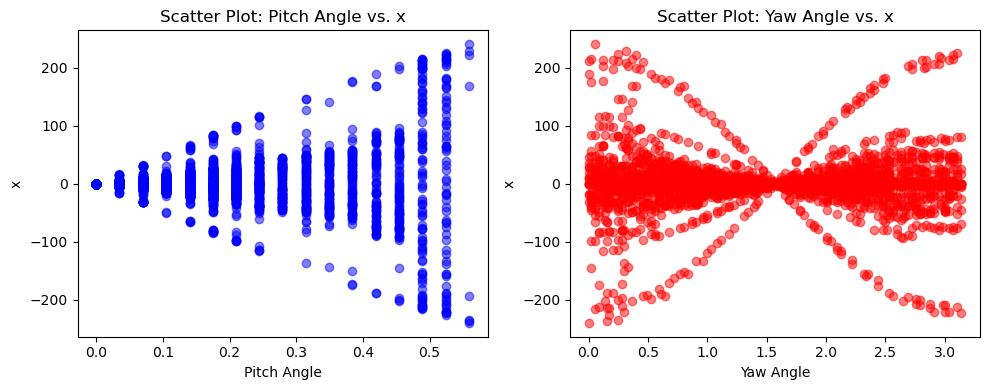

In [92]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(even_rows['x'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of Distance Measurements')

plt.subplot(1, 3, 2)
plt.hist(even_rows['omega'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('Pitch Angle')
plt.ylabel('omega')
plt.title('Histogram of Pitch Angles')

plt.subplot(1, 3, 3)
plt.hist(even_rows['theta'], bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Yaw Angle')
plt.ylabel('theta')
plt.title('Histogram of Yaw Angles')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(even_rows['theta'], even_rows['x'], alpha=0.5, color='blue')
plt.xlabel('Pitch Angle')
plt.ylabel('x')
plt.title('Scatter Plot: Pitch Angle vs. x')

plt.subplot(1, 2, 2)
plt.scatter(even_rows['omega'], even_rows['x'], alpha=0.5, color='red')
plt.xlabel('Yaw Angle')
plt.ylabel('x')
plt.title('Scatter Plot: Yaw Angle vs. x')

plt.tight_layout()
plt.show()


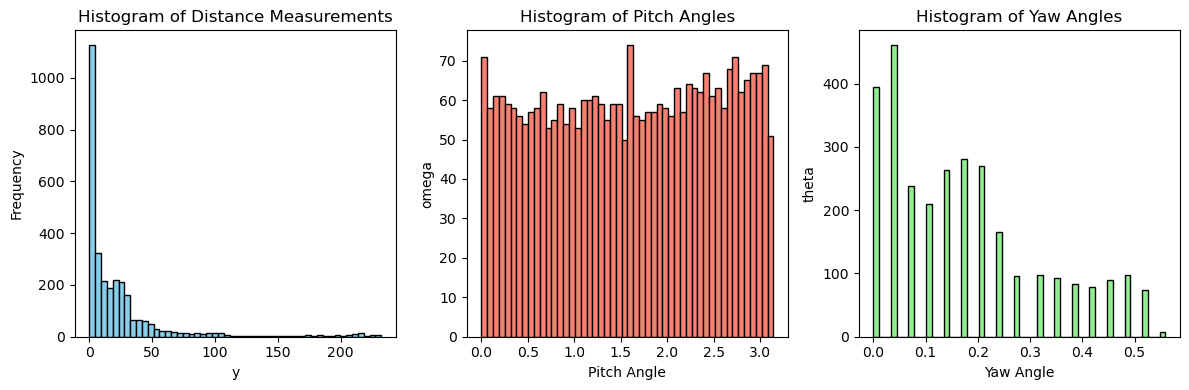

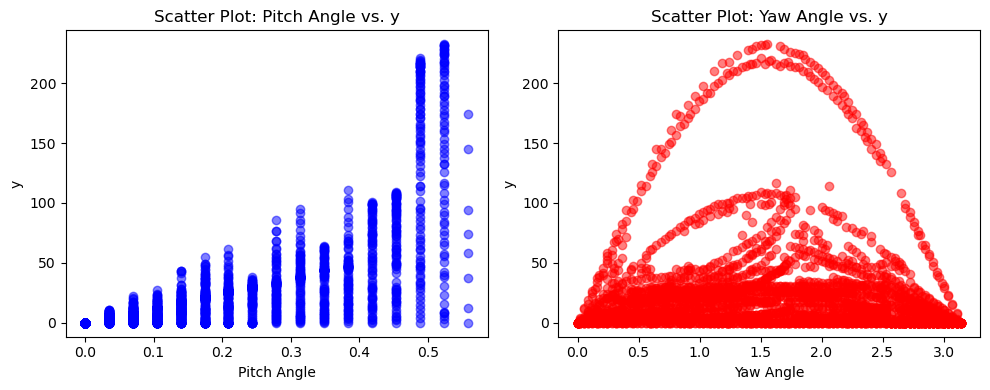

In [93]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(even_rows['y'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Histogram of Distance Measurements')

plt.subplot(1, 3, 2)
plt.hist(even_rows['omega'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('Pitch Angle')
plt.ylabel('omega')
plt.title('Histogram of Pitch Angles')

plt.subplot(1, 3, 3)
plt.hist(even_rows['theta'], bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Yaw Angle')
plt.ylabel('theta')
plt.title('Histogram of Yaw Angles')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(even_rows['theta'], even_rows['y'], alpha=0.5, color='blue')
plt.xlabel('Pitch Angle')
plt.ylabel('y')
plt.title('Scatter Plot: Pitch Angle vs. y')

plt.subplot(1, 2, 2)
plt.scatter(even_rows['omega'], even_rows['y'], alpha=0.5, color='red')
plt.xlabel('Yaw Angle')
plt.ylabel('y')
plt.title('Scatter Plot: Yaw Angle vs. y')

plt.tight_layout()
plt.show()


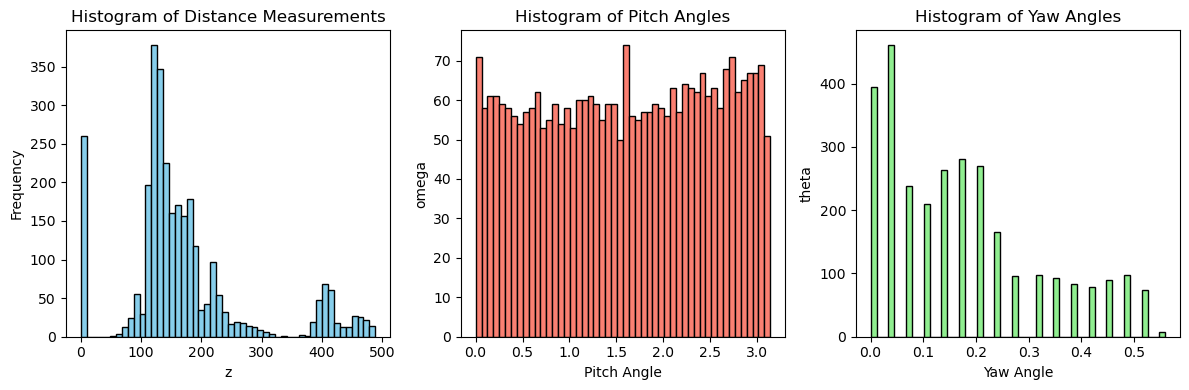

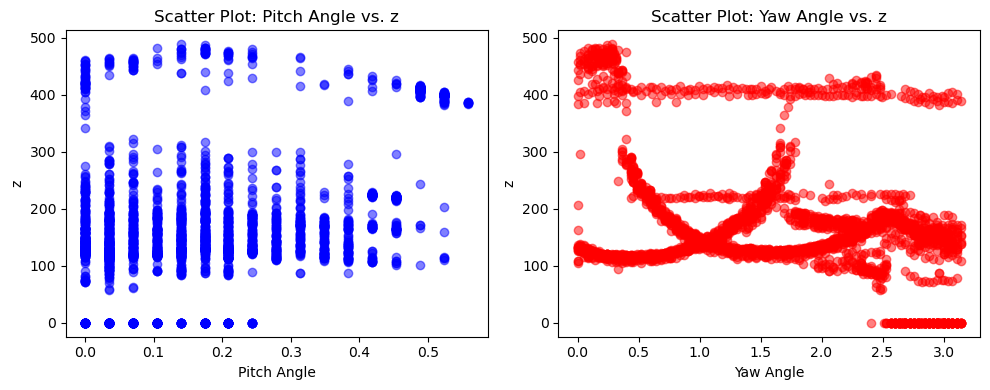

In [94]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(even_rows['z'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('z')
plt.ylabel('Frequency')
plt.title('Histogram of Distance Measurements')

plt.subplot(1, 3, 2)
plt.hist(even_rows['omega'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('Pitch Angle')
plt.ylabel('omega')
plt.title('Histogram of Pitch Angles')

plt.subplot(1, 3, 3)
plt.hist(even_rows['theta'], bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Yaw Angle')
plt.ylabel('theta')
plt.title('Histogram of Yaw Angles')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(even_rows['theta'], even_rows['z'], alpha=0.5, color='blue')
plt.xlabel('Pitch Angle')
plt.ylabel('z')
plt.title('Scatter Plot: Pitch Angle vs. z')

plt.subplot(1, 2, 2)
plt.scatter(even_rows['omega'], even_rows['z'], alpha=0.5, color='red')
plt.xlabel('Yaw Angle')
plt.ylabel('z')
plt.title('Scatter Plot: Yaw Angle vs. z')

plt.tight_layout()
plt.show()


In [95]:
new_df = even_rows.copy()
new_df['Distance'] = np.sqrt(even_rows['x']**2 + even_rows['y']**2 + even_rows['z']**2)

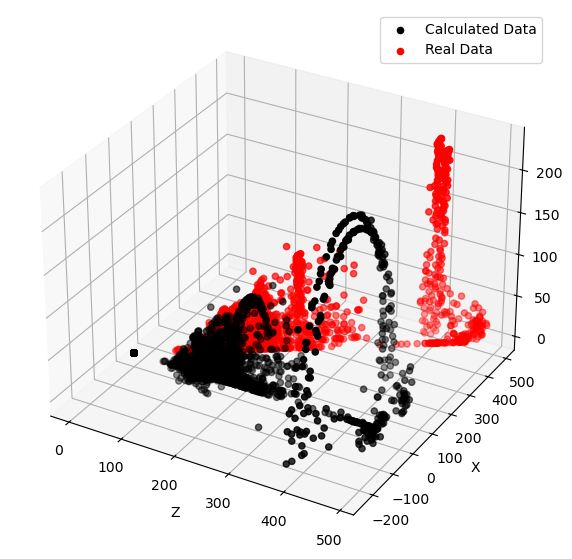

In [96]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot calculated data
ax.scatter3D(even_rows['z'], even_rows['x'], even_rows['y'], color='black', label='Calculated Data')

# Plot real data
ax.scatter3D(new_df['z'], new_df['Distance'], new_df['y'], color='red', label='Real Data')

ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

plt.legend()
plt.show()

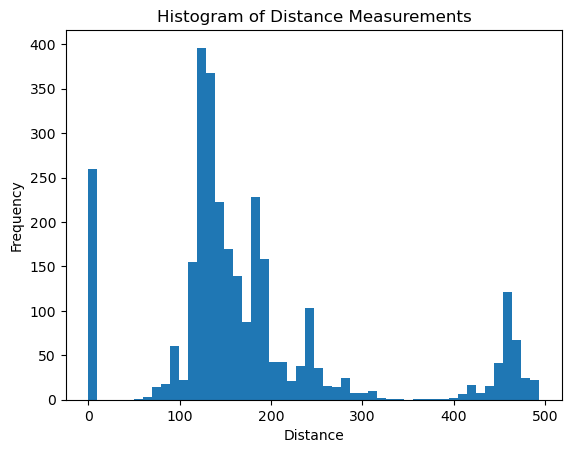

In [97]:
plt.hist(new_df['Distance'], bins=50)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distance Measurements')
plt.show()

In [98]:
listxeven = even_rows['x'].to_numpy()
listyeven = even_rows['y'].to_numpy()
listzeven = even_rows['z'].to_numpy()

lx = np.sum(listxeven)
ly = np.sum(listyeven)
lz = np.sum(listzeven)

n = len(even_rows)

average_x = lx / n
average_y = ly / n
average_z = lz / n

print("Average of column 'x':", average_x)
print("Average of column 'y':", average_y)
print("Average of column 'z':", average_z)

Average of column 'x': 0.42126866666666685
Average of column 'y': 23.588843333333333
Average of column 'z': 171.172175


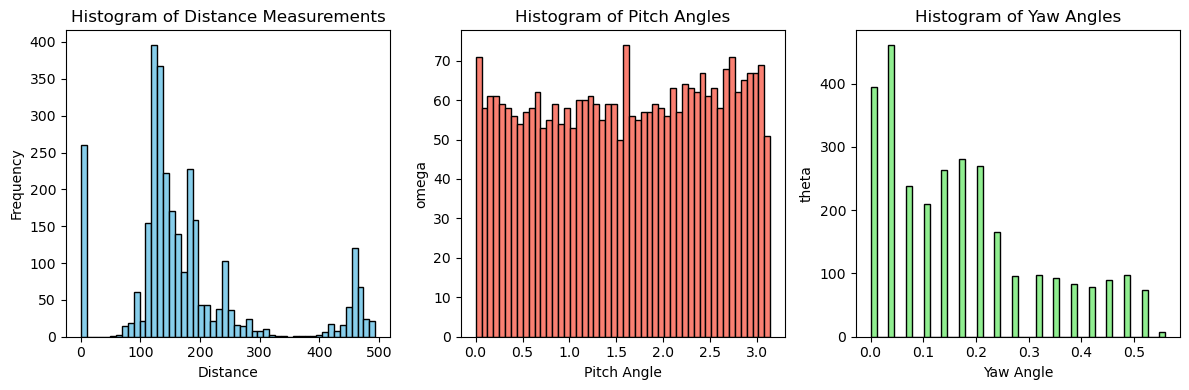

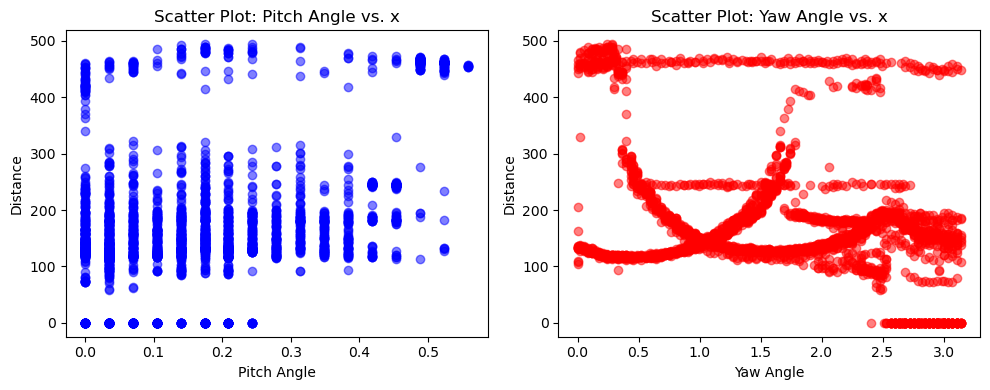

In [99]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(new_df['Distance'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distance Measurements')

plt.subplot(1, 3, 2)
plt.hist(new_df['omega'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('Pitch Angle')
plt.ylabel('omega')
plt.title('Histogram of Pitch Angles')

plt.subplot(1, 3, 3)
plt.hist(new_df['theta'], bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Yaw Angle')
plt.ylabel('theta')
plt.title('Histogram of Yaw Angles')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(new_df['theta'], new_df['Distance'], alpha=0.5, color='blue')
plt.xlabel('Pitch Angle')
plt.ylabel('Distance')
plt.title('Scatter Plot: Pitch Angle vs. x')

plt.subplot(1, 2, 2)
plt.scatter(even_rows['omega'], new_df['Distance'], alpha=0.5, color='red')
plt.xlabel('Yaw Angle')
plt.ylabel('Distance')
plt.title('Scatter Plot: Yaw Angle vs. x')

plt.tight_layout()
plt.show()


In [100]:
listxeven = even_rows['x'].to_numpy()
listyeven = even_rows['y'].to_numpy()
listzeven = even_rows['z'].to_numpy()

lx = np.sum(listxeven)
ly = np.sum(listyeven)
lz = np.sum(listzeven)

n = len(even_rows)

average_x = lx / n
average_y = ly / n
average_z = lz / n

print("Average of column 'x':", average_x)
print("Average of column 'y':", average_y)
print("Average of column 'z':", average_z)

Average of column 'x': 0.42126866666666685
Average of column 'y': 23.588843333333333
Average of column 'z': 171.172175


In [101]:
listxeven = odd_rows['x'].to_numpy()
listyeven = odd_rows['y'].to_numpy()
listzeven = odd_rows['z'].to_numpy()

llx = np.sum(listxeven)
lly = np.sum(listyeven)
llz = np.sum(listzeven)

n = len(odd_rows)

average_x = llx / n
average_y = lly / n
average_z = llz / n

print("Average of column 'x':", average_x)
print("Average of column 'y':", average_y)
print("Average of column 'z':", average_z)

Average of column 'x': 0.18448966666666652
Average of column 'y': 19.675153333333334
Average of column 'z': 177.8566963333333


In [102]:
print ("Percent difference x : ")
if llx > lx:
    print (llx/lx)
else:
    print (lx/llx)

print ("Percent difference y : ")
if lly > ly:
    print (lly/ly)
else:
    print (ly/lly)

print ("Percent difference z : ")
if llz > lz:
    print (llz/lz)
else:
    print (lz/llz)

Percent difference x : 
2.283426894731234
Percent difference y : 
1.1989153494102376
Percent difference z : 
1.039051448246967
